[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Luizfelz/Programa_PoloTech_Modulo-3/blob/main/Projeto_Final.ipynb)

# Análise do Dataset: "Brazilian E-Commerce Public Dataset by Olist"
O Dataset da Olist é composto com informações de 100 mil pedidos, aproximadamente, realizados no período entre 2016 e 2018 em vários marketplaces no Brasil. 

Seus recursos permitem visualizar um pedido por várias dimensões: desde o status do pedido, preço, pagamento, desempenho do frete até a localização do cliente, entre outros. Para um melhor entendimento dos dados contidos no dataset, o conjunto é separado em diversos arquivos, sendo que cada um contém informações específicas sobre o dataset.


O dataset pode ser encontrado no Kaggle, através do link: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce


**Integrantes do grupo:**
- Guilherme Graboski
- Luiz Fonseca
- Matheus Aquino
- Pedro Petersen
- Rodolfo Ricardo
- Rosana Oliveira

________________________________________________________________________________

Importando as bibliotecas que usaremos:

In [2]:
import pandas as pd
import numpy as np

Caso você tenha feito uma cópia do repositório e esteja executando o arquivo localmente, execute a célula abaixo para leitura do dataset.

In [1]:
url_customers = './dataset_projeto_final/olist_customers_dataset.csv'
url_order_items = './dataset_projeto_final/olist_order_items_dataset.csv'
url_order_payments = './dataset_projeto_final/olist_order_payments_dataset.csv'
url_seller = './dataset_projeto_final/olist_sellers_dataset.csv'
url_products = './dataset_projeto_final/olist_products_dataset.csv'
url_orders = './dataset_projeto_final/olist_orders_dataset.csv'
url_order_review  = './dataset_projeto_final/olist_order_reviews_dataset.csv'
url_product_category_name_translation = './dataset_projeto_final/product_category_name_translation.csv'
url_geolocation = './dataset_projeto_final/olist_geolocation_dataset.csv'

Caso você esteja executando o arquivo remotamente, através do Colab ou outro similar, execute a célula abaixo para leitura do dataset.

In [ ]:
url_customers = 'https://raw.githubusercontent.com/Luizfelz/Programa_PoloTech_Modulo-3/main/dataset_projeto_final/olist_customers_dataset.csv'
url_order_items = 'https://raw.githubusercontent.com/Luizfelz/Programa_PoloTech_Modulo-3/main/dataset_projeto_final/olist_order_items_dataset.csv'
url_order_payments = 'https://raw.githubusercontent.com/Luizfelz/Programa_PoloTech_Modulo-3/main/dataset_projeto_final/olist_order_payments_dataset.csv'
url_seller = 'https://raw.githubusercontent.com/Luizfelz/Programa_PoloTech_Modulo-3/main/dataset_projeto_final/olist_sellers_dataset.csv'
url_products = 'https://raw.githubusercontent.com/Luizfelz/Programa_PoloTech_Modulo-3/main/dataset_projeto_final/olist_products_dataset.csv'
url_orders = 'https://raw.githubusercontent.com/Luizfelz/Programa_PoloTech_Modulo-3/main/dataset_projeto_final/olist_orders_dataset.csv'
url_order_review  = 'https://raw.githubusercontent.com/Luizfelz/Programa_PoloTech_Modulo-3/main/dataset_projeto_final/olist_order_reviews_dataset.csv'
url_product_category_name_translation = 'https://raw.githubusercontent.com/Luizfelz/Programa_PoloTech_Modulo-3/main/dataset_projeto_final/product_category_name_translation.csv'
url_geolocation = 'https://raw.githubusercontent.com/Luizfelz/Programa_PoloTech_Modulo-3/main/dataset_projeto_final/olist_geolocation_dataset.csv'

 Para iniciar a análise, primeiramente vamos fazer a leitura de todos os arquivos e guardá-los em variáveis distintas:

In [3]:
df_customers = pd.read_csv(url_customers, sep=',')
df_order_items = pd.read_csv(url_order_items, sep=',', decimal='.')
df_order_payments = pd.read_csv(url_order_payments, sep=',', decimal='.')
df_sellers = pd.read_csv(url_seller, sep=',')
df_products = pd.read_csv(url_products, sep=',')
df_orders = pd.read_csv(url_orders, sep=',')
df_order_reviews = pd.read_csv(url_order_review, sep=',')

As linhas de código abaixo servem somente para imprimirem na tela as colunas dos dataset. Isso facilita para selecionarmos aquilo que gostaríamos de filtrar e com o que vamos trabalhar.

In [ ]:
print(list(df_customers.columns))
print(list(df_order_items.columns))
print(list(df_order_payments.columns))
print(list(df_sellers.columns))
print(list(df_products.columns))
print(list(df_orders.columns))
print(list(df_order_reviews.columns))

Primeira pergunta: **Quais são as categorias de produtos mais propensas à insatisfação dos clientes?**

Primeiro, é necessário que nós façamos alguns 'merges' entre as diferentes planilhas, pegando somente as colunas que gostaríamos de trabalhar.

1º merge:

In [18]:
# Separa somente as colunas que gostaríamos de dar merge
df_orders_col = df_orders[['order_id', 'order_status', 'order_delivered_customer_date','order_estimated_delivery_date']]

# Separa somente as colunas que gostaríamos de dar merge
df_order_items_col = df_order_items[['order_id', 'product_id', 'price', 'freight_value']] 
df_merged_0 = df_orders_col.merge(df_order_items_col, how='inner', on=['order_id'])

2º merge:

In [19]:
df_products_col = df_products[['product_id', 'product_category_name']]
df_merged_1 = df_merged_0.merge(df_products_col, how='inner', on=['product_id'])

3º merge:

In [20]:
df_order_reviews_col = df_order_reviews[['review_id', 'order_id', 'review_score']]
df_merged_2 = df_merged_1.merge(df_order_reviews_col, how='inner', on=['order_id'])

Vamos verificar como ficou o dataframe, após os três merges:

In [22]:
df_merged_2.head()

,order_id,order_status,order_delivered_customer_date,order_estimated_delivery_date,product_id,price,freight_value,product_category_name,review_id,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-10 21:25:13,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,29.99,8.72,utilidades_domesticas,a54f0611adc9ed256b57ede6b6eb5114,4
1,128e10d95713541c87cd1a2e48201934,delivered,2017-08-18 14:44:43,2017-08-28 00:00:00,87285b34884572647811a353c7ac498a,29.99,7.78,utilidades_domesticas,b46f1e34512b0f4c74a72398b03ca788,4
2,0e7e841ddf8f8f2de2bad69267ecfbcf,delivered,2017-08-07 18:30:01,2017-08-15 00:00:00,87285b34884572647811a353c7ac498a,29.99,7.78,utilidades_domesticas,dc90f19c2806f1abba9e72ad3c350073,5
3,bfc39df4f36c3693ff3b63fcbea9e90a,delivered,2017-11-07 18:04:59,2017-11-13 00:00:00,87285b34884572647811a353c7ac498a,29.99,14.10,utilidades_domesticas,1bafb430e498b939f258b9c9dbdff9b1,3
4,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-08-07 15:27:45,2018-08-13 00:00:00,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,perfumaria,8d5266042046a06655c8db133d120ba5,4


Explicação: foram feitos três .merge() seguidos para juntarmos as três planilhas desejadas para a análise que gostaríamos de fazer. Cada .merge() levou em consideração a 'key' que correlaciona as duas planilhas entre si.

Alguns detalhes são importantes para continuarmos a análise: entries, num. de linhas com dados e tipos das colunas. Vamos usar o .info()

In [23]:
df_merged_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112372 entries, 0 to 112371
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112372 non-null  object 
 1   order_status                   112372 non-null  object 
 2   order_delivered_customer_date  110012 non-null  object 
 3   order_estimated_delivery_date  112372 non-null  object 
 4   product_id                     112372 non-null  object 
 5   price                          112372 non-null  float64
 6   freight_value                  112372 non-null  float64
 7   product_category_name          110774 non-null  object 
 8   review_id                      112372 non-null  object 
 9   review_score                   112372 non-null  int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 9.4+ MB


Após a verificação com o .info(), vemos que existem colunas com menos valores que o total de linhas e que algumas colunas precisam ser ajustadas para o tipo correto. 
As colunas com menos valores que a quantidade de linhas do dataset são: 'order_delivered_customer_date' e 'product_category_name'.

In [24]:
list(df_merged_2['product_category_name'].unique())

['utilidades_domesticas',
 'perfumaria',
 'automotivo',
 'pet_shop',
 'papelaria',
 nan,
 'moveis_decoracao',
 'moveis_escritorio',
 'ferramentas_jardim',
 'informatica_acessorios',
 'cama_mesa_banho',
 'brinquedos',
 'construcao_ferramentas_construcao',
 'telefonia',
 'beleza_saude',
 'eletronicos',
 'bebes',
 'cool_stuff',
 'relogios_presentes',
 'climatizacao',
 'esporte_lazer',
 'livros_interesse_geral',
 'eletroportateis',
 'alimentos',
 'malas_acessorios',
 'fashion_underwear_e_moda_praia',
 'artigos_de_natal',
 'moveis_cozinha_area_de_servico_jantar_e_jardim',
 'moveis_sala',
 'casa_conforto',
 'fashion_bolsas_e_acessorios',
 'instrumentos_musicais',
 'audio',
 'casa_construcao',
 'construcao_ferramentas_iluminacao',
 'livros_tecnicos',
 'construcao_ferramentas_jardim',
 'eletrodomesticos',
 'market_place',
 'agro_industria_e_comercio',
 'artigos_de_festas',
 'cds_dvds_musicais',
 'artes',
 'industria_comercio_e_negocios',
 'consoles_games',
 'moveis_quarto',
 'construcao_ferram

Para os fins desta análise, os valores nulos (ou NaN) na coluna 'product_category_name' não serão considerados, uma vez que os produtos sem categoria definida representariam ruídos no dataset caso fossem acrescidos nas análises seguintes.

In [25]:
df_merged_2 = df_merged_2[df_merged_2['product_category_name'].notna()]

**Explicação:** o comando acima retorna um dataset no qual somente as linhas com valores diferentes de None/Null/NaN, da coluna 'product_category_name', estão presentes.

In [26]:
df_merged_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110774 entries, 0 to 112371
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110774 non-null  object 
 1   order_status                   110774 non-null  object 
 2   order_delivered_customer_date  108479 non-null  object 
 3   order_estimated_delivery_date  110774 non-null  object 
 4   product_id                     110774 non-null  object 
 5   price                          110774 non-null  float64
 6   freight_value                  110774 non-null  float64
 7   product_category_name          110774 non-null  object 
 8   review_id                      110774 non-null  object 
 9   review_score                   110774 non-null  int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 9.3+ MB


Já a coluna 'order_delivered_customer_date' representa a data que o consumidor recebeu o pedido em sua casa, ou seja, os pedidos com status de 'delivered'. 
Vamos verificar os diferentes status que os pedidos podem adquirir.

Podemos verificar que os possíveis status atribuídos a um pedido são os apresentados abaixo.

In [27]:
list(df_merged_2['order_status'].unique())

['delivered',
 'shipped',
 'invoiced',
 'canceled',
 'processing',
 'unavailable',
 'approved']

Vamos verificar a porcentagem que cada status representa, do total de dados, dentro do dataset.

In [28]:
df_merged_2.groupby('order_status')['order_status'].count() / df_merged_2.shape[0] * 100

order_status
approved        0.002708
canceled        0.464911
delivered      97.929117
invoiced        0.312348
processing      0.306028
shipped         0.978569
unavailable     0.006319
Name: order_status, dtype: float64

Portanto, para os fins desta análise, somente o status de 'delivered' será considerado.

In [29]:
df_merged_2 = df_merged_2[df_merged_2['order_status'] == 'delivered']

Verificando com o .info()

In [30]:
df_merged_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108480 entries, 0 to 112371
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       108480 non-null  object 
 1   order_status                   108480 non-null  object 
 2   order_delivered_customer_date  108472 non-null  object 
 3   order_estimated_delivery_date  108480 non-null  object 
 4   product_id                     108480 non-null  object 
 5   price                          108480 non-null  float64
 6   freight_value                  108480 non-null  float64
 7   product_category_name          108480 non-null  object 
 8   review_id                      108480 non-null  object 
 9   review_score                   108480 non-null  int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 9.1+ MB


Vemos que existem 8 pedidos que possuem o status de 'delivered', mas que não possuem data de entrega. Para que isso não cause ruídos na análise, vamos desconsiderar esses oito pedidos específicos.

In [31]:
df_merged_2 = df_merged_2[df_merged_2['order_delivered_customer_date'].notna()]

Verificando novamente com o .info()

In [32]:
df_merged_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108472 entries, 0 to 112371
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       108472 non-null  object 
 1   order_status                   108472 non-null  object 
 2   order_delivered_customer_date  108472 non-null  object 
 3   order_estimated_delivery_date  108472 non-null  object 
 4   product_id                     108472 non-null  object 
 5   price                          108472 non-null  float64
 6   freight_value                  108472 non-null  float64
 7   product_category_name          108472 non-null  object 
 8   review_id                      108472 non-null  object 
 9   review_score                   108472 non-null  int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 9.1+ MB


Vemos, agora, que os pedidos restantes são aqueles que possuem o status de 'delivered' e possuem data de entreda do pedido ao cliente.

Depois de dropar todas as linhas com valores NaN e considerar somente os pedidos com status de 'delivered' e data de entrega, transformaremos o tipo das colunas 'order_delivered_customer_date' e 'order_estimated_delivery_date' em datetime.

In [33]:
df_merged_2['order_delivered_customer_date'] = pd.to_datetime(df_merged_2['order_delivered_customer_date'],yearfirst=True)
df_merged_2['order_estimated_delivery_date'] = pd.to_datetime(df_merged_2['order_estimated_delivery_date'],yearfirst=True)

**Explicação:** alguns datasets possuem configurações de datas diferentes. Essa informação é importante, pois precisamos passar ao comando pd.to_datetime() a informação de yearfirst ou dayfirst, caso o ano venha primeiro ou o dia venha primeiro, respectivamente. No caso deste dataset, é yearfirst=True.

Verificando o dataset

In [34]:
df_merged_2

,order_id,order_status,order_delivered_customer_date,order_estimated_delivery_date,product_id,price,freight_value,product_category_name,review_id,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-10 21:25:13,2017-10-18,87285b34884572647811a353c7ac498a,29.99,8.72,utilidades_domesticas,a54f0611adc9ed256b57ede6b6eb5114,4
1,128e10d95713541c87cd1a2e48201934,delivered,2017-08-18 14:44:43,2017-08-28,87285b34884572647811a353c7ac498a,29.99,7.78,utilidades_domesticas,b46f1e34512b0f4c74a72398b03ca788,4
2,0e7e841ddf8f8f2de2bad69267ecfbcf,delivered,2017-08-07 18:30:01,2017-08-15,87285b34884572647811a353c7ac498a,29.99,7.78,utilidades_domesticas,dc90f19c2806f1abba9e72ad3c350073,5
3,bfc39df4f36c3693ff3b63fcbea9e90a,delivered,2017-11-07 18:04:59,2017-11-13,87285b34884572647811a353c7ac498a,29.99,14.10,utilidades_domesticas,1bafb430e498b939f258b9c9dbdff9b1,3
4,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-08-07 15:27:45,2018-08-13,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,perfumaria,8d5266042046a06655c8db133d120ba5,4
...,...,...,...,...,...,...,...,...,...,...
112367,e8fd20068b9f7e6ec07068bb7537f781,delivered,2017-08-23 15:36:29,2017-08-31,0df37da38a30a713453b03053d60d3f7,356.00,18.12,esporte_lazer,f5453b3d33358ed459eb4312392b96a8,4
112368,e8fd20068b9f7e6ec07068bb7537f781,delivered,2017-08-23 15:36:29,2017-08-31,0df37da38a30a713453b03053d60d3f7,356.00,18.12,esporte_lazer,f5453b3d33358ed459eb4312392b96a8,4
112369,cfa78b997e329a5295b4ee6972c02979,delivered,2018-01-26 15:45:14,2018-01-18,3d2c44374ee42b3003a470f3e937a2ea,55.90,15.14,instrumentos_musicais,8ea780895f362ce949029f95b7181ff0,1
112370,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-17 15:08:01,2017-03-28,ac35486adb7b02598c182c2ff2e05254,72.00,13.08,beleza_saude,e262b3f92d1ce917aa412a9406cf61a6,5


Agora com o .info()

In [35]:
df_merged_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108472 entries, 0 to 112371
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       108472 non-null  object        
 1   order_status                   108472 non-null  object        
 2   order_delivered_customer_date  108472 non-null  datetime64[ns]
 3   order_estimated_delivery_date  108472 non-null  datetime64[ns]
 4   product_id                     108472 non-null  object        
 5   price                          108472 non-null  float64       
 6   freight_value                  108472 non-null  float64       
 7   product_category_name          108472 non-null  object        
 8   review_id                      108472 non-null  object        
 9   review_score                   108472 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 

Prosseguindo com a análise, lembramos que a pergunta que queremos responder é:

 **Quais são as categorias de produtos mais propensas à insatisfação dos clientes?**

Para isso, primeiramente vamos fazer uma análise da média do 'review_score' para cada categoria de produto.

Usando o .groupby() + .agg() para agrupar por categoria de produtos:
a média, a mediana e o desvio padrão são utilizadas para que se possa ter uma melhor abordagem dos resultados. 

In [36]:
df_merged_2.groupby('product_category_name').agg({'review_score':['mean','std','median']}).sort_values(by=[('review_score','mean')])

review_score                 
                                                      mean       std median
product_category_name                                                      
seguros_e_servicos                                2.500000  2.121320    2.5
fraldas_higiene                                   3.378378  1.497245    3.0
portateis_cozinha_e_preparadores_de_alimentos     3.428571  1.504572    3.5
moveis_escritorio                                 3.517428  1.522628    4.0
pc_gamer                                          3.625000  1.685018    4.0
...                                                    ...       ...    ...
construcao_ferramentas_ferramentas                4.444444  1.117780    5.0
livros_importados                                 4.508772  1.135826    5.0
livros_interesse_geral                            4.511278  1.029629    5.0
cds_dvds_musicais                                 4.642857  0.633324    5.0
fashion_roupa_infanto_juvenil                     5.000000  0.000000    5.0

[73 rows x 3 columns]

De forma gráfica, apenas mostrando os valores apresentados acima:

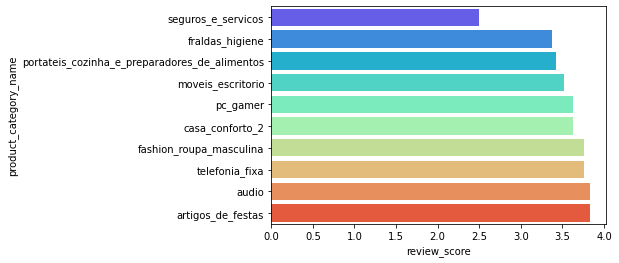

In [37]:
import seaborn as sns

df_plot = df_merged_2.groupby('product_category_name').mean().reset_index().sort_values('review_score')
sns.barplot(x = 'review_score', y = 'product_category_name', data = df_plot[:10], palette = 'rainbow')

Verificando a primeira categoria, que possui a menor média, podemos inferir que de acordo com o desvio padrão, os valores dos dados na amostra não são homogênio, ou seja, as reviews estão espalhadas dentro de 1 a 5 pontos, que são os valores possíveis para as reviews. 


Isso nos faz pensar no seguinte: **qual o motivo de alguns clientes darem a nota mais baixa e outros darem a nota mais alta para a mesma categoria de produto?** 

Vamos levar em consideração a categoria 'seguros_e_servicos'.

Agrupando pelo 'review_score', especificando a categoria de 'seguros_e_servicos', ou seja, queremos saber quantos deram 1 ponto, quantos deram 2, e assim por diante:

In [38]:
df_merged_2[df_merged_2['product_category_name'] == 'seguros_e_servicos'].groupby('review_score')['review_score'].count()

review_score
1    1
4    1
Name: review_score, dtype: int64

Se calcularmos na mão, vemos que é exatamente isso: um pedido deu 1 ponto de 'review_score' e outro pedido deu 4 pontos de 'review_score'. Outra pergunta pode surgir na nossa cabeça: essa última categoria, 'fashion_roupa_infanto_juvenil' com média 5, quantos pedidos foram feitos nela e, consequentemente, qual a distribuição de votos (de 1 a 5) nesta categoria? Vamos verificar:

In [39]:
df_merged_2[df_merged_2['product_category_name'] == 'fashion_roupa_infanto_juvenil'].groupby('review_score')['review_score'].count()

review_score
5    7
Name: review_score, dtype: int64

Considerando que categorias que possuem poucas compras (ou seja, amostra pequena de dados) podem nos fornecer resultados "mascarados", vamos então fazer média, desvio e  mediana para as cateogiras que mais tiveram pedidos.
Primeiro, vamos verificar quantos pedidos foram feitos em cada categoria.

In [40]:
df_merged_2.groupby('product_category_name').agg({'order_id':['count']}).sort_values(by=[('order_id','count')], ascending=False) #.head(20)

,order_id
,count
product_category_name,
cama_mesa_banho,10985
beleza_saude,9456
esporte_lazer,8435
moveis_decoracao,8159
informatica_acessorios,7671
...,...
portateis_cozinha_e_preparadores_de_alimentos,14
la_cuisine,13


De forma gráfica, para visualizarmos o quanto cada categoria impacta no total de pedidos:

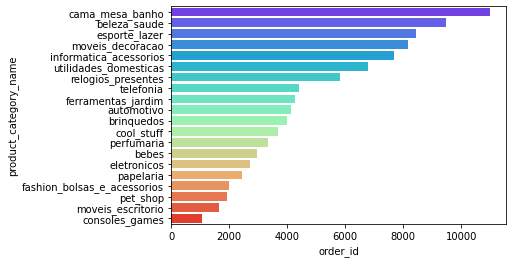

In [64]:
df_plot_2 = df_merged_2.groupby('product_category_name').count().reset_index().sort_values('order_id', ascending=False)
sns.barplot(x = 'order_id', y = 'product_category_name', data = df_plot_2[:20], palette = 'rainbow')

Vemos que as cinco maiores categorias possuem bastante dados (bastante pedidos), o que permite que façamos a análise para essas cinco categorias sem que os resultados sejam mascarados devido ao baixo número de pedidos. Logo, criando um novo dataframe apenas com as 20 maiores categorias:

In [43]:
col_df_merged_2_20_maiores = list((df_merged_2.groupby('product_category_name').agg({'order_id':['count']}).sort_values(by=[('order_id','count')], ascending=False)).index[:20])
df_20_maiores_categorias = df_merged_2.loc[df_merged_2['product_category_name'].isin(col_df_merged_2_20_maiores)]
df_20_maiores_categorias.head()

,order_id,order_status,order_delivered_customer_date,order_estimated_delivery_date,product_id,price,freight_value,product_category_name,review_id,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-10 21:25:13,2017-10-18,87285b34884572647811a353c7ac498a,29.99,8.72,utilidades_domesticas,a54f0611adc9ed256b57ede6b6eb5114,4
1,128e10d95713541c87cd1a2e48201934,delivered,2017-08-18 14:44:43,2017-08-28,87285b34884572647811a353c7ac498a,29.99,7.78,utilidades_domesticas,b46f1e34512b0f4c74a72398b03ca788,4
2,0e7e841ddf8f8f2de2bad69267ecfbcf,delivered,2017-08-07 18:30:01,2017-08-15,87285b34884572647811a353c7ac498a,29.99,7.78,utilidades_domesticas,dc90f19c2806f1abba9e72ad3c350073,5
3,bfc39df4f36c3693ff3b63fcbea9e90a,delivered,2017-11-07 18:04:59,2017-11-13,87285b34884572647811a353c7ac498a,29.99,14.10,utilidades_domesticas,1bafb430e498b939f258b9c9dbdff9b1,3
4,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-08-07 15:27:45,2018-08-13,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,perfumaria,8d5266042046a06655c8db133d120ba5,4


Agora, verificando a média, mediana e o desvio para as 20 categorias que mais tiveram pedidos:

In [44]:
df_20_maiores_categorias.groupby('product_category_name').agg({'review_score':['mean','std','median']}).sort_values(by=[('review_score','mean')])

review_score                 
                                    mean       std median
product_category_name                                    
moveis_escritorio               3.517428  1.522628    4.0
cama_mesa_banho                 3.920983  1.430071    5.0
moveis_decoracao                3.950116  1.433356    5.0
informatica_acessorios          3.985139  1.411090    5.0
telefonia                       3.995009  1.351859    5.0
eletronicos                     4.067503  1.334007    5.0
relogios_presentes              4.071613  1.347233    5.0
bebes                           4.079205  1.354594    5.0
ferramentas_jardim              4.081335  1.359785    5.0
utilidades_domesticas           4.108407  1.327666    5.0
automotivo                      4.116132  1.311366    5.0
consoles_games                  4.137963  1.268585    5.0
esporte_lazer                   4.166331  1.300191    5.0
beleza_saude                    4.190778  1.288103    5.0
fashion_bolsas_e_acessorios     4.192578  1.239922    5.0
cool_stuff                      4.194700  1.250568    5.0
brinquedos                      4.207688  1.278186    5.0
perfumaria                      4.215610  1.302744    5.0
pet_shop                        4.217527  1.258850    5.0
papelaria                       4.244002  1.234439    5.0

Como a categoria de 'moveis_escritorio' teve a menor média, vamos fazer a análise individual desta categoria.

In [45]:
df_merged_2[df_merged_2['product_category_name'] == 'moveis_escritorio'].groupby('review_score')['review_score'].count()

review_score
1    339
2     84
3    237
4    385
5    619
Name: review_score, dtype: int64

Vemos que ela teve uma quantidade de votos 1 bastante significativa, em comparação com as demais. Portanto, ela poderia ser considerada a categoria mais propensa à insatisfação dos clientes (neste intervalo das 20 categorias com maior quantidade de pedidos).

Assim sendo, focando a análise na categoria de 'moveis_escritorio', vamos tentar descobrir qual a tendência para tantos votos 1 nesta categoria. Podemos considerar 2 pontos:
  1. Entrega atrasada
  2. Preço do frete alto

Inicialmente, para a Entrega Atrasada, temos que verificar quantos pedidos da categoria 'moveis_escritorio' foram entregues depois do prazo estimado de entrega.

Definindo um novo DataFrame apenas com a categoria de 'moveis_escritorio':

In [47]:
df_merged_2_moveis_escritorios = df_merged_2[df_merged_2['product_category_name'] == 'moveis_escritorio']
df_merged_2_moveis_escritorios.head()

,order_id,order_status,order_delivered_customer_date,order_estimated_delivery_date,product_id,price,freight_value,product_category_name,review_id,review_score
250,e69bfb5eb88e0ed6a785585b27e16dbf,delivered,2017-08-16 17:14:30,2017-08-23,9a78fb9862b10749a117f7fc3c31f051,149.99,19.77,moveis_escritorio,abc5655186d40772bd6e410420e6a3ed,5
251,336e923c0b5e6d95d3d0644bf4c516c4,delivered,2017-03-31 10:45:51,2017-04-25,9a78fb9862b10749a117f7fc3c31f051,169.96,34.56,moveis_escritorio,cbd92921512b20c2117ec5c76e859b8f,2
252,9d364f50124ed8e149404dfd3908ac02,delivered,2017-02-24 15:32:24,2017-03-22,9a78fb9862b10749a117f7fc3c31f051,149.96,22.38,moveis_escritorio,55fca7d821498b68faa2df220613a8b8,3
253,e192b63496e874f9ec02a62d97ac23be,delivered,2018-04-21 00:48:52,2018-04-12,9a78fb9862b10749a117f7fc3c31f051,159.99,59.29,moveis_escritorio,e43589d9b1eb36907925a598bf511d52,1
254,19d468d1424d2a259a1f3d3fa073f41a,delivered,2017-05-26 16:14:40,2017-06-13,9a78fb9862b10749a117f7fc3c31f051,169.96,40.07,moveis_escritorio,3d0746e0f8bf4bd55b7b3f3dd385b828,5


Filtrando para as entregas atrasadas:

In [49]:
df_entrega_atrasada = df_merged_2_moveis_escritorios[df_merged_2_moveis_escritorios['order_delivered_customer_date'] >= df_merged_2_moveis_escritorios['order_estimated_delivery_date']]
df_entrega_atrasada.head()

,order_id,order_status,order_delivered_customer_date,order_estimated_delivery_date,product_id,price,freight_value,product_category_name,review_id,review_score
253,e192b63496e874f9ec02a62d97ac23be,delivered,2018-04-21 00:48:52,2018-04-12,9a78fb9862b10749a117f7fc3c31f051,159.99,59.29,moveis_escritorio,e43589d9b1eb36907925a598bf511d52,1
3010,bae57c09bbe07561fcbfefd604dafba8,delivered,2018-01-24 21:38:08,2018-01-18,90b58782fdd04cb829667fcc41fb65f5,179.99,46.73,moveis_escritorio,1ae4100b35bcffc90fa53912c98c935f,1
3011,a45d988c5f5764f548ae6fa14a8ee773,delivered,2017-12-01 19:24:39,2017-11-28,90b58782fdd04cb829667fcc41fb65f5,179.99,64.75,moveis_escritorio,4df3ee6b6d341dd5fde210834e9ea10a,3
3012,a45d988c5f5764f548ae6fa14a8ee773,delivered,2017-12-01 19:24:39,2017-11-28,90b58782fdd04cb829667fcc41fb65f5,179.99,64.75,moveis_escritorio,4df3ee6b6d341dd5fde210834e9ea10a,3
3013,a45d988c5f5764f548ae6fa14a8ee773,delivered,2017-12-01 19:24:39,2017-11-28,90b58782fdd04cb829667fcc41fb65f5,179.99,64.75,moveis_escritorio,4df3ee6b6d341dd5fde210834e9ea10a,3


Podemos ver acima os pedidos que tiveram entregas atrasadas. Mas quanto, desse total, é referente à voto 1, ou 2, ou 3...?

In [50]:
df_entrega_atrasada.groupby('review_score')['review_score'].count()

review_score
1    72
2    12
3    18
4    11
5    34
Name: review_score, dtype: int64

Podemos perceber que os votos 1 e 2 somam 84, enquanto que 4 e 5 somam 45, que é pouco mais que a metade.
Porém, e em relação aos pedidos que foram entregues dentro do prazo? Vamos verificar.

Filtrando para os pedidos com a entrega antes do estimado:

In [51]:
df_entrega_em_dia = df_merged_2_moveis_escritorios[df_merged_2_moveis_escritorios['order_delivered_customer_date'] <= df_merged_2_moveis_escritorios['order_estimated_delivery_date']]
df_entrega_em_dia.groupby('review_score')['review_score'].count()

review_score
1    267
2     72
3    219
4    374
5    585
Name: review_score, dtype: int64

Percebemos que a soma dos votos 1 e 2 é 339 enquanto que a soma dos votos 4 e 5 é 959, quase o triplo.

Ou seja, podemos dizer que, de certa forma, a entrega atrasa influencia sim no 'review_score' daquela categoria. Contudo, ainda podemos fazer outra análise.

Considerando, agora, o Preço do Frete Alto. Para isso, vamos estipular como "Alto" aquele frete cujo valor é maior ou igual a 50% do valor do pedido em si.

Filtrando os pedidos cujo frete é considerado Alto:

In [52]:
df_frete_alto = df_merged_2_moveis_escritorios[df_merged_2_moveis_escritorios['freight_value'] > (df_merged_2_moveis_escritorios['price'] * 0.5)]
df_frete_alto.head()

,order_id,order_status,order_delivered_customer_date,order_estimated_delivery_date,product_id,price,freight_value,product_category_name,review_id,review_score
3004,71dab1155600756af6de79de92e712e3,delivered,2018-03-12 18:58:21,2018-03-22,308e4e21ae228a10f6370a243ae59995,76.99,40.69,moveis_escritorio,17f05bdffb5d96f6af3f472419e71251,3
3005,71dab1155600756af6de79de92e712e3,delivered,2018-03-12 18:58:21,2018-03-22,308e4e21ae228a10f6370a243ae59995,76.99,40.69,moveis_escritorio,17f05bdffb5d96f6af3f472419e71251,3
3006,71dab1155600756af6de79de92e712e3,delivered,2018-03-12 18:58:21,2018-03-22,308e4e21ae228a10f6370a243ae59995,76.99,40.69,moveis_escritorio,17f05bdffb5d96f6af3f472419e71251,3
3007,71dab1155600756af6de79de92e712e3,delivered,2018-03-12 18:58:21,2018-03-22,308e4e21ae228a10f6370a243ae59995,76.99,40.69,moveis_escritorio,17f05bdffb5d96f6af3f472419e71251,3
3008,71dab1155600756af6de79de92e712e3,delivered,2018-03-12 18:58:21,2018-03-22,308e4e21ae228a10f6370a243ae59995,76.99,40.69,moveis_escritorio,17f05bdffb5d96f6af3f472419e71251,3


Verificando o total de voto no 'review_score':

In [53]:
df_frete_alto.groupby('review_score')['review_score'].count()

review_score
1    31
2    11
3    31
4    18
5    44
Name: review_score, dtype: int64

Percebemos que desta vez a distribuição está bem homogênia, sendo que os votos 1 e 2 somam 44 e os votos 4 e 5 somam 62, valores bem próximos.

E para os fretes baixos (valor do frete menos que 50% do valor do pedido)?

In [54]:
df_frete_baixo = df_merged_2_moveis_escritorios[df_merged_2_moveis_escritorios['freight_value'] < (df_merged_2_moveis_escritorios['price'] * 0.5)]
df_frete_baixo.groupby('review_score')['review_score'].count()

review_score
1    308
2     73
3    206
4    367
5    575
Name: review_score, dtype: int64

Agora, os votos 1 e 2 somam 381, enquanto que os votos 4 e 5 somam 942, mais uma vez quase o triplo. 

Porém, como os pedidos com frete considerados Altos não tiveram uma diferença muito significativa, não podemos inferir que o alto valor do frete tenha influência direta sobre o 'review_score' da categoria e, consequentemente, à insatisfação dos clientes quanto ao pedido.

Para finalizar, já que consideramos o 'review_score' e o tempo de entrega estimado do pedido, vamos apresentar um gráfico que mostra, de forma geral, **qual a tendência de o consumidor atribuir uma nota baixa para o pedido de acordo com o tempo total que demora para o pedido ser entregue, a partir da data da compra?**

Antes, alguns passos são necessários:

4º merge e transformação da coluna no tipo 'datetime':

In [55]:
df_orders_col_2 = df_orders[['order_id','order_purchase_timestamp']]
df_merged_3 = df_merged_2.merge(df_orders_col_2, how='inner', on=['order_id']) 

df_merged_3['order_purchase_timestamp'] = pd.to_datetime(df_merged_3['order_purchase_timestamp'],yearfirst=True)

Cálculo do tempo de entrega do pedido, desde o momento da compra até o recebimento pelo consumidor:

In [56]:
tempo_entrega = df_merged_3['order_delivered_customer_date'] - df_merged_3['order_purchase_timestamp'] 

Transformação do tempo de entrega em segundos, para facilitar o cálculo da quantidade total de dias para entrega:

In [57]:
tempo_entrega_em_segundos = tempo_entrega.apply(lambda x: x.total_seconds()) 

Transformação de segundos em dias, para melhor interpretação, adicionando esta informação em uma nova coluna no dataframe:

In [58]:
df_merged_3['tempo_entrega_dias'] = round(tempo_entrega_em_segundos / 86400, 2)

Visualizando o novo dataframe com a nova coluna:

In [60]:
df_merged_3.head()

,order_id,order_status,order_delivered_customer_date,order_estimated_delivery_date,product_id,price,freight_value,product_category_name,review_id,review_score,order_purchase_timestamp,tempo_entrega_dias
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-10 21:25:13,2017-10-18,87285b34884572647811a353c7ac498a,29.99,8.72,utilidades_domesticas,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-02 10:56:33,8.44
1,128e10d95713541c87cd1a2e48201934,delivered,2017-08-18 14:44:43,2017-08-28,87285b34884572647811a353c7ac498a,29.99,7.78,utilidades_domesticas,b46f1e34512b0f4c74a72398b03ca788,4,2017-08-15 18:29:31,2.84
2,0e7e841ddf8f8f2de2bad69267ecfbcf,delivered,2017-08-07 18:30:01,2017-08-15,87285b34884572647811a353c7ac498a,29.99,7.78,utilidades_domesticas,dc90f19c2806f1abba9e72ad3c350073,5,2017-08-02 18:24:47,5.00
3,bfc39df4f36c3693ff3b63fcbea9e90a,delivered,2017-11-07 18:04:59,2017-11-13,87285b34884572647811a353c7ac498a,29.99,14.10,utilidades_domesticas,1bafb430e498b939f258b9c9dbdff9b1,3,2017-10-23 23:26:46,14.78
4,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-08-07 15:27:45,2018-08-13,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,perfumaria,8d5266042046a06655c8db133d120ba5,4,2018-07-24 20:41:37,13.78


Podemos mostrar, graficamente, o tempo de entrega (em dias) para todos os pedidos:

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


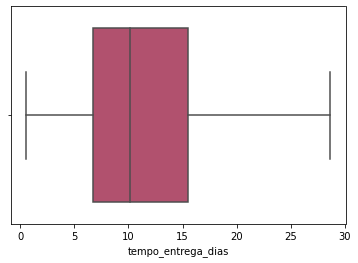

In [61]:
sns.boxplot(df_merged_3['tempo_entrega_dias'], orient = 'h', showfliers = False, palette = 'flare')

Dessa forma, observando o gráfico, podemos perceber que o tempo de entrega do pedido, desde a data da compra até o recebimento do pedido pelo consumidor, fica entre 7 e 15 dias (aproximadamente).



> OBS: o erro que é dado ao executar o comando acima é facilmente corrigido explicitando o 'eixo x' do gráfico, ou seja, colocando o comando como:

> `sns.boxplot(x = df_merged_3['tempo_entrega_dias'], orient = 'h', showfliers = False, palette = 'flare').`

> Essa alteração será obrigatória em versões futuras, de acordo com o que é explicado no próprio log do erro.









Finalmente, respodendo à última pergunta: 

**Qual a tendência de o consumidor atribuir uma nota baixa para o pedido de acordo com o tempo total que demora para o pedido ser entregue, a partir da data da compra?**

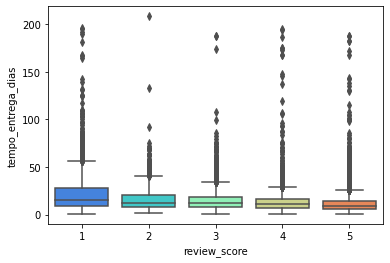

In [65]:
sns.boxplot(x = 'review_score', y = 'tempo_entrega_dias', data = df_merged_3, palette = 'rainbow')

Portanto, utilizando o dataframe por completo e pelo gráfico abaixo, não podemos garantir que o tempo de entrega do produto tenha influência no 'review_score', mas é possível perceber que existe sim alguma correlação entre o review aplicado pelo consumidor e a demora no recebimento do pedido, à partir da data de compra.

Para mais informações sobre o que o seaborn pode fazer: https://seaborn.pydata.org/api.html

________________________________________________________________________________

Alguns notebooks que podem fornecer mais informações diversificadas e alguns insights sobre 'O que possível ser feito e ser analisado?' com esse dataset:


- [Geospatial Analysis of Brazilian E-Commerce](https://www.kaggle.com/code/andresionek/geospatial-analysis-of-brazilian-e-commerce?kernelSessionId=7894200)

- [E-Commerce Sentiment Analysis: EDA + Viz + NLP](https://www.kaggle.com/code/thiagopanini/e-commerce-sentiment-analysis-eda-viz-nlp?kernelSessionId=43455270)

- [Olist eCommerce-Analytics, Quasi Poisson+Poly Regs](https://www.kaggle.com/code/anshumoudgil/olist-ecommerce-analytics-quasi-poisson-poly-regs?kernelSessionId=28308821)


________________________________________________________________________________

**Demais perguntas que podem ser feitas e podem ser usadas para uma análise mais focada:**

## Pergunta 1: 
Qual estado tem mais clientes?

In [ ]:
df_customers.groupby(['customer_state'])['customer_state'].count().sort_values(ascending=False)

## Pergunta 2: 
Quais as 5 cidades que mais tiveram clientes?

In [ ]:
df_customers.groupby(['customer_city'])['customer_city'].count().sort_values(ascending=False).head()

## Pergunta 3: 
Quantas cidades tiveram uma única venda?

In [ ]:
(df_customers.groupby(['customer_city'])['customer_city'].count().sort_values(ascending=False) == 1).sum()


## Pergunta 4: 
Qual a média do valor do frete?

In [ ]:
df_order_items['freight_value'].mean()


## Pergunta 5: 
Qual a média do valor dos preços dos produtos?

In [ ]:
df_order_items['price'].mean()

## Pergunta 6: 
Qual o valor do produto mais caro?

In [ ]:
df_order_items['price'].max()

## Pergunta 7: 
Qual o valor do produto mais barato?

In [ ]:
df_order_items['price'].min()

## Pergunta 8: 
Qual foi a quantidade de vendas por forma de pagamento?

In [ ]:
df_order_payments.groupby(['payment_type'])['payment_type'].count().sort_values(ascending=False)

## Pergunta 9: 
Quais os cinco estados com mais vendedores?

In [ ]:
df_sellers.groupby('seller_state')['seller_state'].count().sort_values(ascending=False).head()


## Pergunta 10: 
Quais os cinco estados com menos vendedores?

In [ ]:
df_sellers.groupby('seller_state')['seller_state'].count().sort_values(ascending=False).tail()

________________________________________________________________________________